In [ ]:
!pip install keras_core
!pip install keras_cv
!pip install kagle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 9.7 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement kagle (from versions: none)
ERROR: No matching distribution found for kagle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()  # Pilih file kaggle.json yang diunduh

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rinrinnurmalasari5","key":"e57297cf7043e020cb9b7060046d6354"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  # Tentukan path ke folder yang berisi kaggle.json


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mariafrenti/age-prediction")

print("Path to dataset files:", path)

100%|██████████| 2.03G/2.03G [00:09<00:00, 218MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mariafrenti/age-prediction/versions/3


In [ ]:
import shutil
import os

# Get the actual path of the downloaded dataset
downloaded_path = '/root/.cache/kagglehub/datasets/mariafrenti/age-prediction/versions/3'  # Update with the correct path if needed

# Check if the downloaded path exists
if os.path.exists(downloaded_path):
    # Copy the folder to the destination, and set dirs_exist_ok=True to avoid the error
    shutil.copytree(downloaded_path, '/content/age-prediction', dirs_exist_ok=True)
else:
    print(f"Error: Source directory not found: {downloaded_path}")
    print("Please check the download location or if the dataset was downloaded correctly.")

In [ ]:
!ls /content/age-prediction/


20-50  age_prediction_up


In [ ]:
import os

# Melihat isi dari folder /content/age-prediction
folder_path = '/content/age-prediction'
files = os.listdir(folder_path)

# Menampilkan semua file dan folder dalam path tersebut
for file in files:
    print(file)


20-50
age_prediction_up


In [ ]:
import shutil

# Menyalin folder age_prediction_up ke lokasi lain (misalnya ke /content/age_prediction_up)
# The dirs_exist_ok=True argument allows the copy to proceed even if the destination directory exists.
shutil.copytree(os.path.join(folder_path, 'age_prediction_up'), '/content/age', dirs_exist_ok=True)

'/content/age'

In [ ]:
# Melihat isi dari folder age_prediction_up
folder_up_path = '/content/age'
up_files = os.listdir(folder_up_path)

# Menampilkan semua file dalam folder age_prediction_up
for file in up_files:
    print(file)


age_prediction


In [ ]:
import os

# Path ke folder age_prediction
folder_path = '/content/age/age_prediction'

# Menampilkan semua file dalam folder age_prediction
files_in_folder = os.listdir(folder_path)

for file in files_in_folder:
    print(file)


test
train


In [ ]:
import os

# Path ke folder train dan test
train_folder_path = '/content/age/age_prediction/train'
test_folder_path = '/content/age/age_prediction/test'

# Menampilkan file dalam folder train
train_files = os.listdir(train_folder_path)
print("Isi folder train:")
for file in train_files:
    print(file)

# Menampilkan file dalam folder test
test_files = os.listdir(test_folder_path)
print("Isi folder test:")
for file in test_files:
    print(file)


Isi folder train:
032
031
072
087
030
006
050
007
086
091
001
025
035
016
022
090
096
082
028
056
075
040
043
080
060
059
048
008
019
089
053
021
097
095
042
069
093
083
020
078
004
044
003
026
076
018
081
029
064
002
011
071
085
062
038
057
066
094
100
088
037
049
023
012
054
068
047
027
063
079
041
052
014
013
010
058
045
024
077
005
055
092
098
015
051
067
036
046
073
017
074
034
009
065
070
099
039
033
084
061
Isi folder test:
032
031
072
087
030
006
050
007
086
091
001
025
035
016
022
090
096
082
028
056
075
040
043
080
060
059
048
008
019
089
053
021
097
095
042
069
093
083
020
078
004
044
003
026
076
018
081
029
064
002
011
071
085
062
038
057
066
094
100
088
037
049
023
012
054
068
047
027
063
079
041
052
014
013
010
058
045
024
077
005
055
092
098
015
051
067
036
046
073
017
074
034
009
065
070
099
039
033
084
061


In [ ]:
import os
import shutil

def limit_files_in_folder(folder_path, max_files):
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            files = os.listdir(subfolder_path)
            if len(files) > max_files:
                # Menghapus file berlebih
                excess_files = files[max_files:]
                for file in excess_files:
                    file_path = os.path.join(subfolder_path, file)
                    os.remove(file_path)

# Batasi jumlah file di folder train
limit_files_in_folder(train_folder_path, 1000)

# Batasi jumlah file di folder test
limit_files_in_folder(test_folder_path, 400)

print("Jumlah file telah dibatasi.")

Jumlah file telah dibatasi.


In [ ]:
# Fungsi untuk menghitung jumlah file dalam subfolder
def count_files_in_folder(folder_path):
    folder_counts = {}
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):  # Pastikan hanya folder yang dihitung
            file_count = len(os.listdir(subfolder_path))  # Hitung file dalam subfolder
            folder_counts[subfolder] = file_count
    return folder_counts
# Menghitung jumlah file di dalam folder train
train_file_counts = count_files_in_folder(train_folder_path)

# Menghitung jumlah file di dalam folder test
test_file_counts = count_files_in_folder(test_folder_path)

# Menampilkan jumlah file untuk setiap subfolder dalam folder train
print("Jumlah file di dalam setiap subfolder folder train:")
for subfolder, count in train_file_counts.items():
    print(f"Folder {subfolder}: {count} file")

# Menampilkan jumlah file untuk setiap subfolder dalam folder test
print("\nJumlah file di dalam setiap subfolder folder test:")
for subfolder, count in test_file_counts.items():
    print(f"Folder {subfolder}: {count} file")

Jumlah file di dalam setiap subfolder folder train:
Folder 032: 1000 file
Folder 031: 1000 file
Folder 072: 508 file
Folder 087: 85 file
Folder 030: 1000 file
Folder 006: 97 file
Folder 050: 1000 file
Folder 007: 149 file
Folder 086: 101 file
Folder 091: 48 file
Folder 001: 778 file
Folder 025: 1000 file
Folder 035: 1000 file
Folder 016: 1000 file
Folder 022: 1000 file
Folder 090: 82 file
Folder 096: 22 file
Folder 082: 184 file
Folder 028: 1000 file
Folder 056: 1000 file
Folder 075: 377 file
Folder 040: 1000 file
Folder 043: 1000 file
Folder 080: 270 file
Folder 060: 1000 file
Folder 059: 1000 file
Folder 048: 1000 file
Folder 008: 295 file
Folder 019: 1000 file
Folder 089: 46 file
Folder 053: 1000 file
Folder 021: 1000 file
Folder 097: 8 file
Folder 095: 13 file
Folder 042: 1000 file
Folder 069: 562 file
Folder 093: 24 file
Folder 083: 122 file
Folder 020: 1000 file
Folder 078: 283 file
Folder 004: 181 file
Folder 044: 1000 file
Folder 003: 198 file
Folder 026: 1000 file
Folder 076: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras_core as keras
import tensorflow as tf
import keras_cv
import glob
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend


In [ ]:
image_paths = glob.glob("/content/age/age_prediction/train/*/*.jpg") + glob.glob("/content/age/age_prediction/test/*/*.jpg")
image_df = pd.DataFrame(image_paths)
if not image_df.empty:
    image_df = image_df[0].str.split("/").apply(lambda x: x[-3:])
    image_df = pd.DataFrame(image_df.tolist(), columns=['split', 'age_group', 'filename'])
    image_df['filepath'] = "/content/drive/MyDrive/Colab Notebooks/dataset/" + image_df['split'] + "/" + image_df['age_group'] + "/" + image_df['filename']
    image_df.head(5)
else:
    print("No image files found in the specified directory.")

In [ ]:
print(image_df.groupby("split")['age_group'].nunique())
print (image_df.groupby(["split"])['filename'].count())

split
test     100
train    100
Name: age_group, dtype: int64
split
test     23232
train    63769
Name: filename, dtype: int64


In [ ]:
# Project is structured as /train/<age>/image.jpg, /test/<age>/image.jpg
image_paths = glob.glob("/content/age/age_prediction/train/*/*.jpg") + glob.glob("/content/age/age_prediction/test/*/*.jpg")

image_df = pd.DataFrame(image_paths)
# Check if the DataFrame is empty before accessing the column
if not image_df.empty:
    # Access the column containing the file paths using its name, which is 0
    # Since the column name is an integer, use iloc to access it
    image_df = image_df[0].str.split("/").apply(lambda x: x[-3:])
    image_df = pd.DataFrame(image_df.tolist(), columns=['split', 'age_group', 'filename'])
    # Updated filepath to reflect the correct location on Google Drive
    # Change this line:
    #image_df['filepath'] = "/content/drive/MyDrive/Colab Notebooks/dataset/" + image_df['split'] + "/" + image_df['age_group'] + "/" + image_df['filename']
    # to this:
    image_df['filepath'] = "/content/age/age_prediction/" + image_df['split'] + "/" + image_df['age_group'] + "/" + image_df['filename']
    image_df.head(5)
else:
    print("No image files found in the specified directory.")

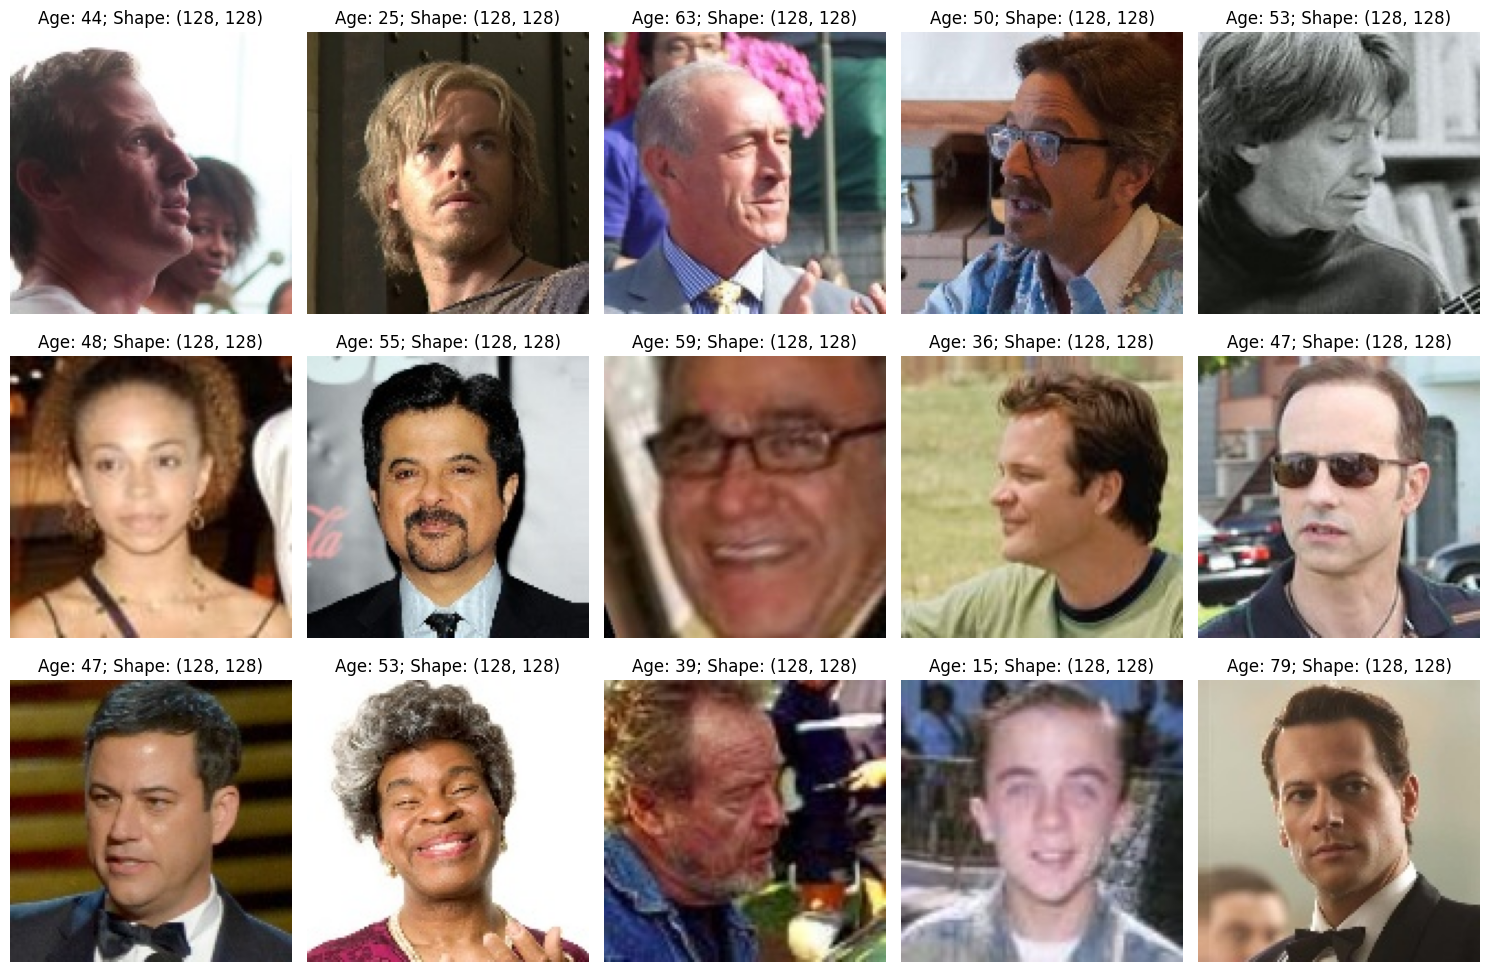

In [ ]:
temp = image_df[image_df['split'] == 'train'].sample(15)

f, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
ax = ax.ravel()

for i, row in enumerate(temp.itertuples()):
    img = keras.utils.load_img(row[-1])
    ax[i].imshow(img)
    ax[i].set_title(f'Age: {int(row[2])}; Shape: {img.size}')
    ax[i].axis('off')

plt.tight_layout();

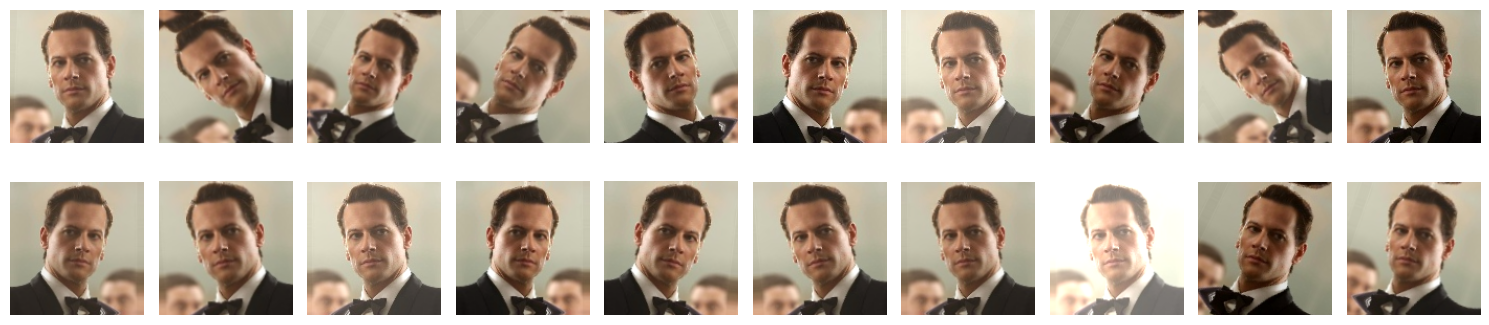

In [ ]:
with tf.device("GPU"):
    augmenter = keras_cv.layers.RandomAugmentationPipeline(
        layers=[
            keras_cv.layers.RandomFlip(),
            keras_cv.layers.RandomContrast(value_range=(0, 1), factor=0.1),
            keras_cv.layers.RandomZoom(height_factor=(-0.1, 0.1)),
            keras_cv.layers.RandomBrightness(value_range=(0, 1), factor=0.2),
            keras_cv.layers.RandomRotation(0.1),
        ],
        augmentations_per_image=3,
    )
f, ax = plt.subplots(ncols=10, nrows=2, figsize=(15, 4))
ax = ax.ravel()

for i in range(20):
    ax[i].imshow(augmenter(np.array(img) / 255))
    ax[i].axis('off')

plt.tight_layout();

In [ ]:
def create_dataset(filepaths, shuffle=False, augmenter=None, batch_size=32):

    if shuffle:
        filepaths = filepaths.sample(frac=1)

    temp: tf.data.Dataset = tf.data.Dataset.from_tensor_slices(filepaths)

    temp = temp.map(lambda x: (
        tf.image.resize(tf.image.decode_image(tf.io.read_file(x), channels=3, dtype='float32', expand_animations=False), size=(128, 128)),
        tf.strings.to_number(tf.strings.split(x, "/")[-2])
    ), num_parallel_calls=tf.data.AUTOTUNE)

    temp = temp.map(lambda x, y: (tf.ensure_shape(x, (128, 128, 3)), y))
    temp = temp.batch(batch_size)

    if augmenter:
        temp = temp.map(lambda x, y: (augmenter(x), y), tf.data.AUTOTUNE)

    temp = temp.prefetch(tf.data.AUTOTUNE)
    return temp

In [ ]:
with tf.device("GPU"):
    train_ds = create_dataset(image_df.loc[image_df['split'] == 'train', 'filepath'], shuffle=True, augmenter=None)
    val_ds = create_dataset(image_df.loc[image_df['split'] == 'test', 'filepath'], shuffle=True, augmenter=None)


CPU times: user 528 ms, sys: 276 ms, total: 804 ms
Wall time: 473 ms


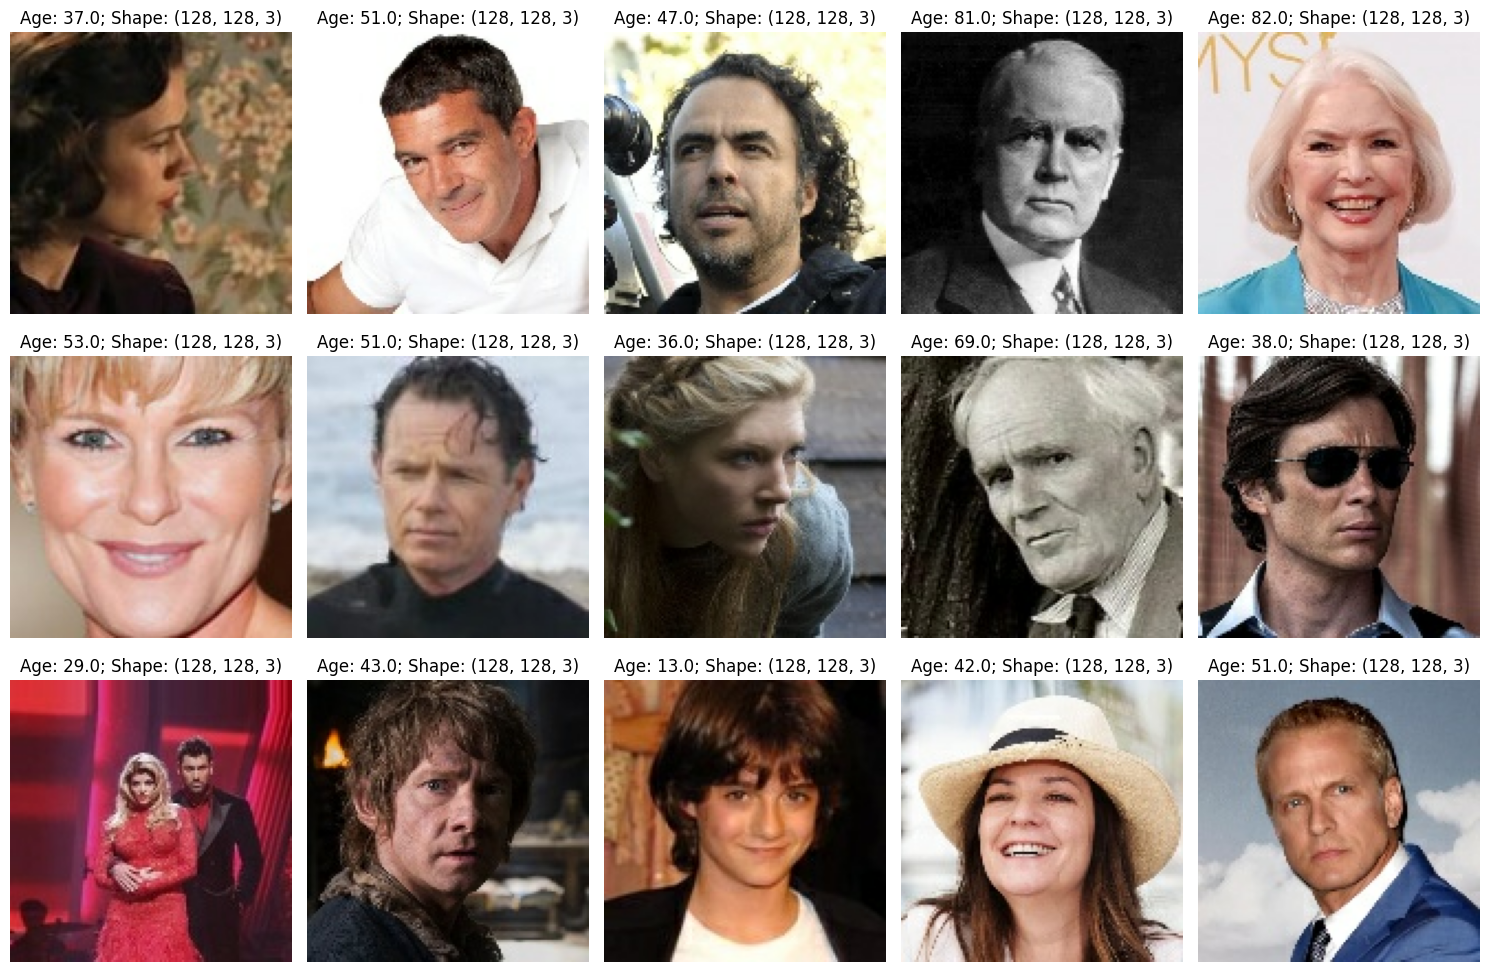

In [ ]:
%%time
temp = list(train_ds.unbatch().take(15))

f, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
ax = ax.ravel()

for i, (img, age) in enumerate(temp):
    ax[i].imshow(img)
    ax[i].set_title(f'Age: {age}; Shape: {img.shape}')
    ax[i].axis('off')

plt.tight_layout();

In [ ]:
def get_model(mode='regression'):

    base_model = keras.applications.MobileNetV3Small(include_top=False, include_preprocessing=False, input_shape=(128, 128, 3))
    base_model.trainable = False

    input_ = keras.layers.Input(shape=(128, 128, 3))
    global_pool_layer = keras.layers.GlobalAvgPool2D()
    dense = keras.layers.Dense(units=32, activation='relu')

    if mode == 'classification':
        output_layer = keras.layers.Dense(units=100, activation='softmax')
    else:
        output_layer = keras.layers.Dense(1, activation='relu')


    x = input_
    x = base_model(x, training=False)
    x = global_pool_layer(x)
    x = dense(x)
    output_ = output_layer(x)

    model = keras.models.Model(inputs=input_, outputs=output_)

    if mode == 'classification':
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    else:
        model.compile(loss='mse', optimizer='adam', metrics=['mae'])

    return model

model = get_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras_core/src/applications/mobilenet_v3.py:446: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step       


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)         │ (None, 128, 128, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ MobilenetV3small (Functional)      │ (None, 4, 4, 576)             │     939,120 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ global_average_pooling2d           │ (None, 576)                   │           0 │
│ (GlobalAveragePooling2D)           │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 32)                    │      18,464 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 1)                     │          33 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 957,617 (3.65 MB)

 Trainable params: 18,497 (72.25 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [ ]:
model.save("test.keras")
keras.models.load_model("test.keras")
! rm test.keras

/usr/local/lib/python3.11/dist-packages/keras_core/src/saving/saving_lib.py:347: UserWarning: Skipping variable loading for optimizer 'adam', because it has 286 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [ ]:

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [ ]:

hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping]
)


train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

Epoch 1/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - loss: 436.0307 - mae: 16.5915 - val_loss: 226.3454 - val_mae: 12.0325
Epoch 2/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 245.6499 - mae: 12.5297 - val_loss: 214.3578 - val_mae: 11.6546
Epoch 3/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 234.1026 - mae: 12.1880 - val_loss: 209.6660 - val_mae: 11.5055
Epoch 4/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 227.9921 - mae: 12.0153 - val_loss: 206.6306 - val_mae: 11.4042
Epoch 5/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 223.2209 - mae: 11.8743 - val_loss: 204.3219 - val_mae: 11.3176
Epoch 6/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 219.2615 - mae: 11.7578 - val_loss: 202.6431 - val_mae: 11.2523
Epoch 7/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 215.8712 - mae: 11.6563 - val_loss: 201.3051 - val_mae: 11.2093
Epoch 8/30
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 212.9279 - mae: 11.5670 - val_loss: 200.3344 - 

726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 196.7180 - mae: 11.0633
Loss: 198.5811309814453
MAE: 11.102645874023438
726/726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


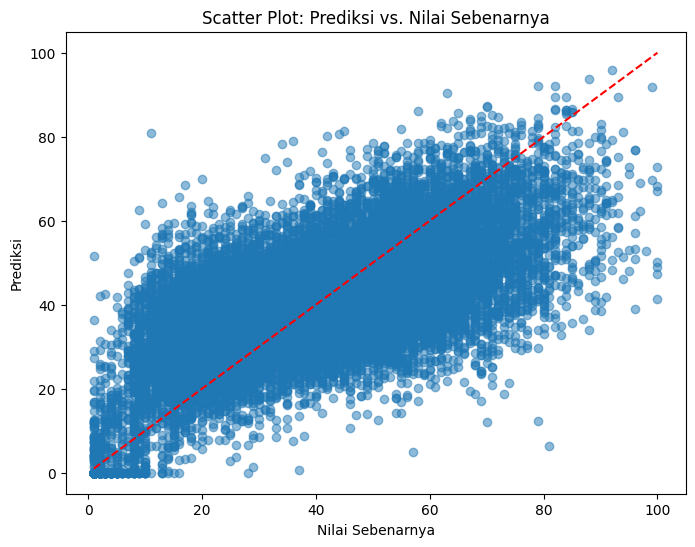

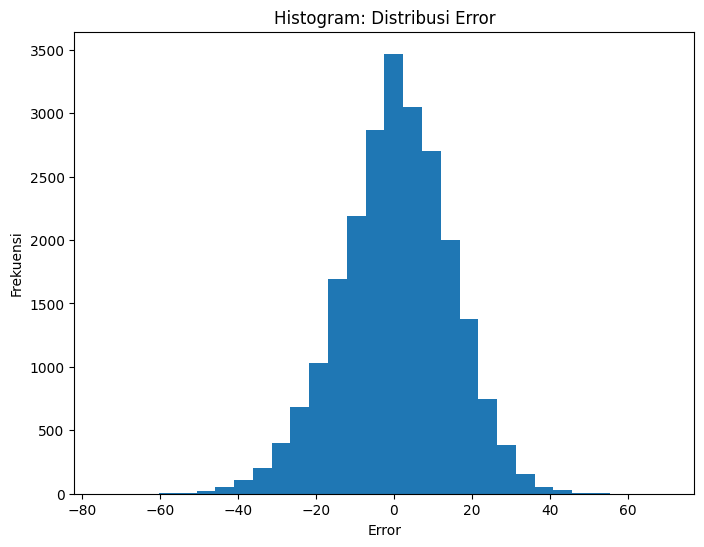

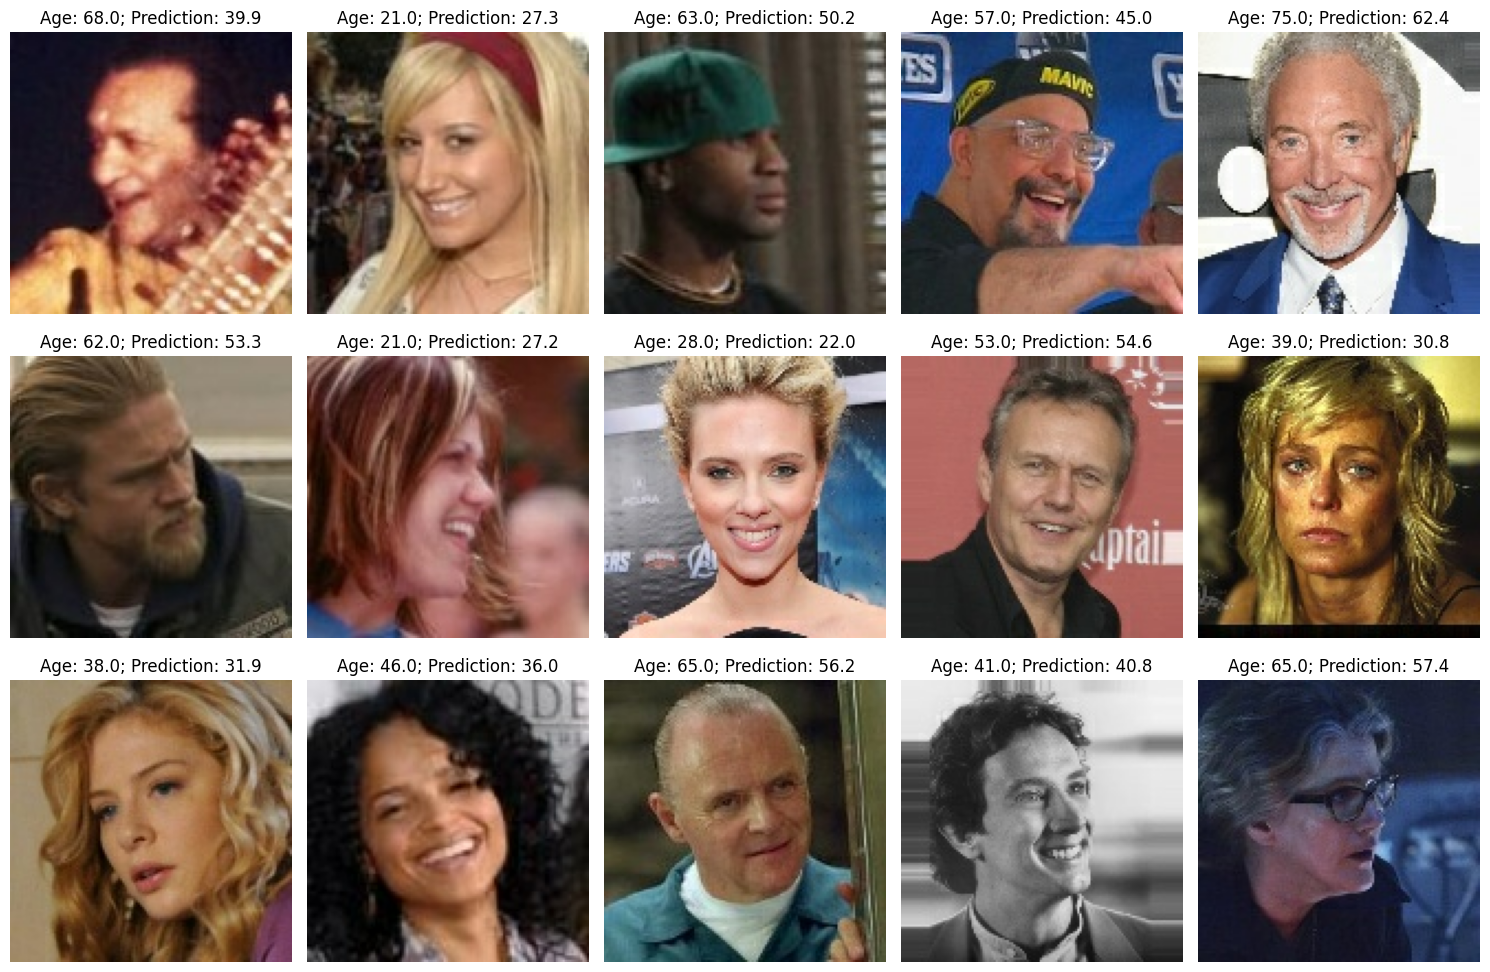

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (kode untuk membuat dan melatih model) ...

# 1. Evaluasi Model
loss, mae = model.evaluate(val_ds)
print("Loss:", loss)
print("MAE:", mae)

# 2. Prediksi pada Data Pengujian
predictions = model.predict(val_ds)

# 3. Visualisasi

# a. Scatter Plot: Prediksi vs. Nilai Sebenarnya
y_true = []  # List untuk menyimpan nilai sebenarnya
for images, labels in val_ds:
    y_true.extend(labels.numpy())

plt.figure(figsize=(8, 6))
plt.scatter(y_true, predictions, alpha=0.5)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Prediksi")
plt.title("Scatter Plot: Prediksi vs. Nilai Sebenarnya")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--') # Garis diagonal
plt.show()

# b. Histogram: Distribusi Error
errors = predictions.flatten() - y_true  # Hitung error
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30)
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.title("Histogram: Distribusi Error")
plt.show()

# c. Visualisasi Prediksi pada Beberapa Sampel
temp = list(val_ds.unbatch().shuffle(1000).take(15))

f, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
ax = ax.ravel()

for i, (img, age) in enumerate(temp):
    pred = str(round(model.predict(keras.ops.expand_dims(img, axis=0), verbose=False)[0][0], 1))
    ax[i].imshow(img)
    ax[i].set_title(f'Age: {age}; Prediction: {pred}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

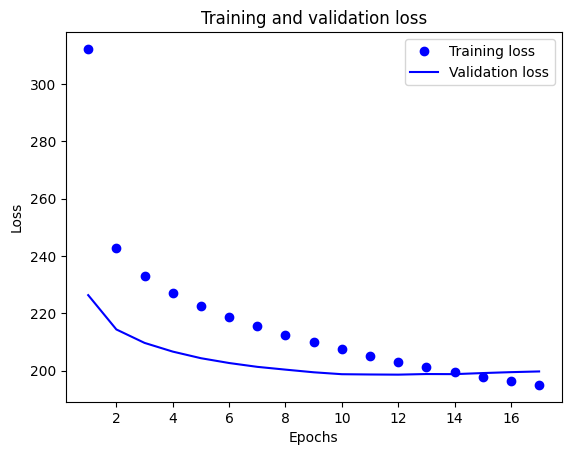

In [ ]:
import matplotlib.pyplot as plt

# Buat grafik loss pelatihan dan pengujian
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Axes: >

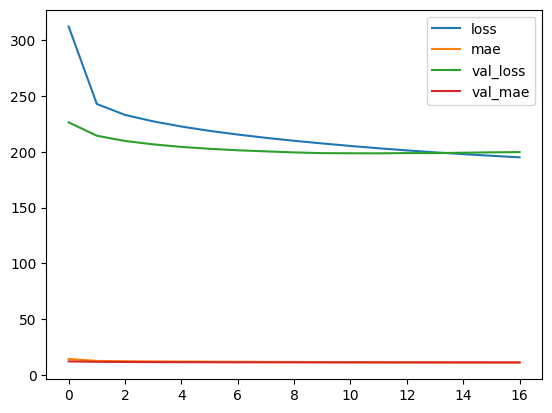

In [ ]:
pd.DataFrame(hist.history, index=hist.epoch).plot()

In [ ]:

hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping]
)


train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

In [ ]:
model = keras.models.load_model("./age_detection.keras")

/usr/local/lib/python3.11/dist-packages/keras_core/src/saving/saving_lib.py:347: UserWarning: Skipping variable loading for optimizer 'adam', because it has 286 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


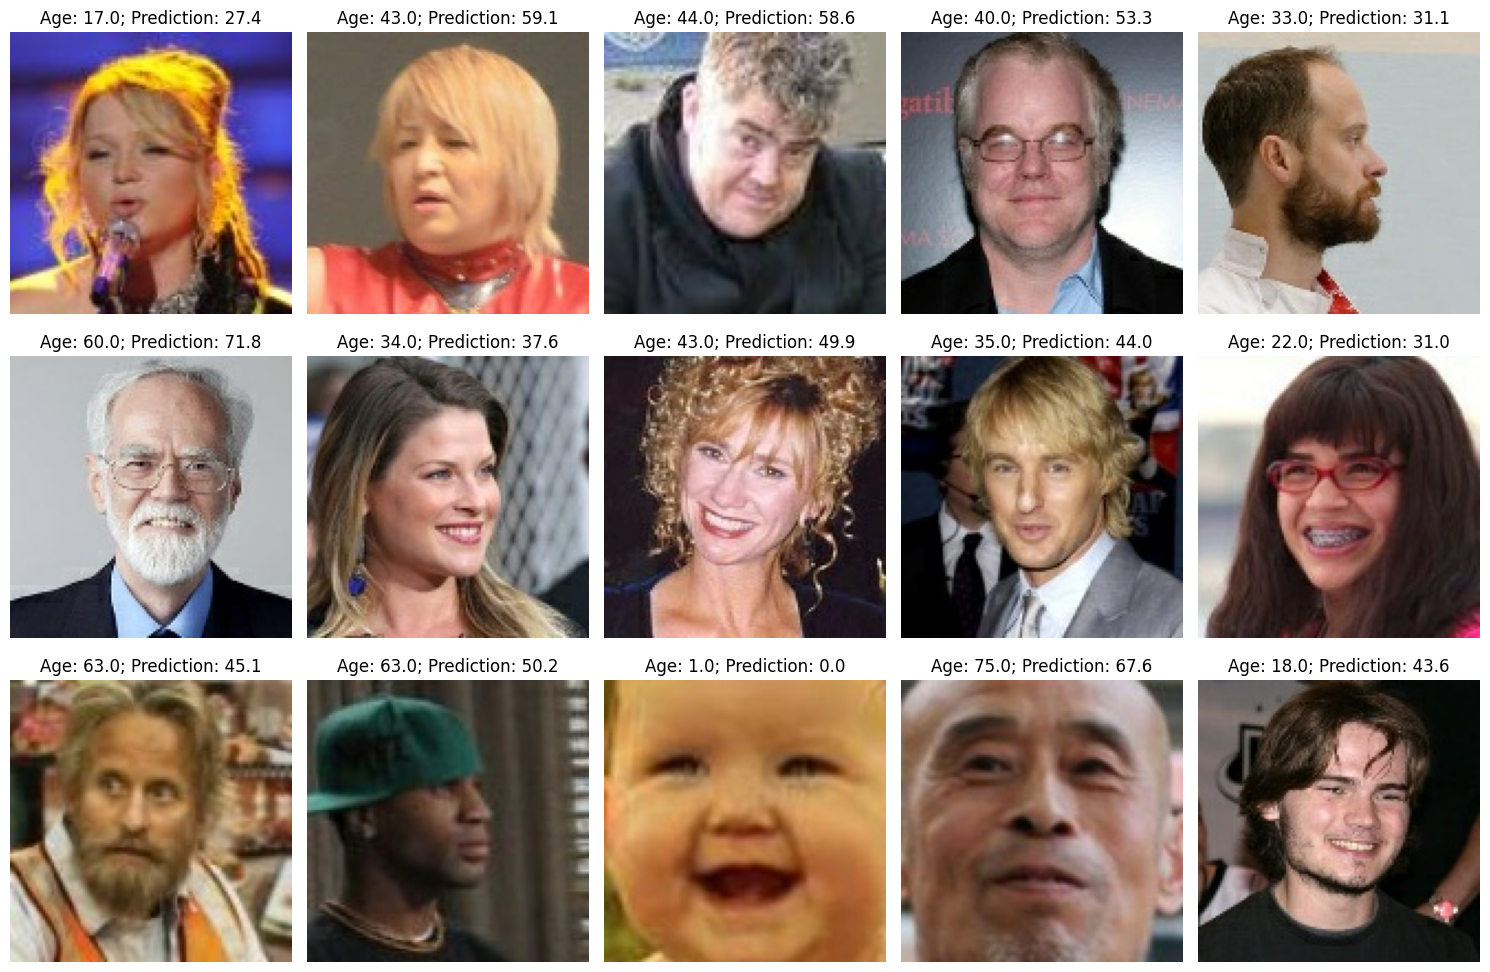

In [ ]:
temp = list(val_ds.unbatch().shuffle(1000).take(15))

f, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
ax = ax.ravel()

for i, (img, age) in enumerate(temp):
    pred = str(round(model.predict(keras.ops.expand_dims(img, axis=0), verbose=False)[0][0], 1))
    ax[i].imshow(img)
    ax[i].set_title(f'Age: {age}; Prediction: {pred}')
    ax[i].axis('off')

plt.tight_layout();

In [ ]:
# Export the model
export_path = 'age_detection_saved_model'
export_archive = keras.export.ExportArchive()
export_archive.add_endpoint(
    name="serve",
    fn=model.call,
    input_signature=[tf.TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32)],
)
export_archive.write_out(export_path)

# Convert the saved model using TFLiteConverter
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # enable TensorFlow ops.
]
tflite_model = converter.convert()

# Save the model.
with open('age_detection.tflite', 'wb') as f:
  f.write(tflite_model)

print ("Tflite Model saved to path: ./age_detection.tflite")

Saved artifact at 'age_detection_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  inputs (POSITIONAL_OR_KEYWORD): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)
  training (POSITIONAL_OR_KEYWORD): Literal[None]
  mask (POSITIONAL_OR_KEYWORD): Literal[None]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136527487066640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487063952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487067024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487065296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487064528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487065104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487064912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487062608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136527487065488: TensorSpec(shape=(), dtype=tf.resour

In [ ]:
# Load TFLite model and allocate tensors.
with open("./age_detection.tflite", 'rb') as f:
    tflite_model = f.read()

# Load the tflite model, allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Print the signatures
signatures = interpreter.get_signature_list()
print(signatures)

{'serving_default': {'inputs': ['inputs'], 'outputs': ['output_0']}}


In [ ]:
temp = np.array(keras.preprocessing.image.load_img("/content/drive/MyDrive/diva.jpg", target_size=(128, 128))) / 255
temp = keras.ops.expand_dims(temp, axis=0)
temp = keras.ops.cast(temp, dtype='float32')

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

interpreter.set_tensor(input_index, temp)
interpreter.invoke()

# Compare TF Lite predictions with our actual model
print (interpreter.get_tensor(output_index), model.predict(temp, verbose=False))

[[59.65303]] [[59.84176]]
